   ## Major project

### Problem statement:
          Design a project from the MNIST dataset to identify digit classification using the SVM algorithm


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline 

In [2]:
data=pd.read_csv("digit_svm.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
data['label'].value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

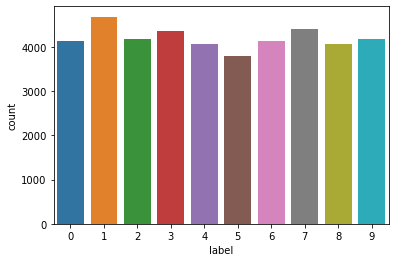

In [6]:
sns.countplot(data['label'])
plt.show()

In [7]:
y_data=data['label']
feature_col=[i for i in data.columns if i != 'label']
X_data=data[feature_col]

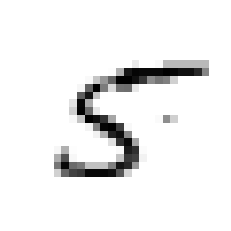

In [8]:
some_digit =X_data.iloc[144].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.8,random_state=40,stratify=y_data)

In [ ]:
pipeline=Pipeline([('scaler',StandardScaler()),
                 ('SVM',SVC(kernel='rbf',probability=True))])
params={'SVM__C':[0.001,0.01,0.1,10,100,10e5], 'SVM__gamma':[10,1,0.1,0.01]}
model= GridSearchCV(pipeline,params,cv=3)
model.fit(X_train,y_train)

print("testing score=%3.2f"%(model.score(X_test,y_test)))
print("best parameter fro the data:",model.best_params_)

y_pred=model.predict(X_test)
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred,digits=3))

y_prob = model.predict_proba(X_test)


macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


In [ ]:
pipeline=Pipeline([('scaler',StandardScaler()),
                 ('SVM',SVC(kernel='poly',probability=True))])
params={'SVM__C':[0.001,0.01,0.1,10,100,10e5], 'SVM__gamma':[10,1,0.1,0.01]}
model= GridSearchCV(pipeline,params,cv=3)

model.fit(X_train,y_train)


print("testing score=%3.2f"%(model.score(X_test,y_test)))
print("best parameter fro the data:",model.best_params_)

y_pred=model.predict(X_test)
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred,digits=3))
y_prob = model.predict_proba(X_test)


macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

